In [5]:
import numpy as np
import os
import cv2
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dropout,Flatten,Dense,GlobalAveragePooling2D

In [6]:
files_train=0
files_validation=0
cwd=os.getcwd()
folder='/content/drive/MyDrive/projectmn/parking project/train_data/train'

for sub_folder in os.listdir(folder):
  path,dirs,files=next(os.walk(os.path.join(folder,sub_folder)))
  files_train=files_train+len(files)
folder='/content/drive/MyDrive/projectmn/parking project/train_data/test'

for sub_folder in os.listdir(folder):
  path,dirs,files=next(os.walk(os.path.join(folder,sub_folder)))
  files_validation=files_validation+len(files)
print(files_train,files_validation)


432 164


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
img_width,img_height=48,48
train_data_dir='/content/drive/MyDrive/projectmn/parking project/train_data/train'
validation_data_dir='/content/drive/MyDrive/projectmn/parking project/train_data/test'
nb_train_sample=files_train
nb_validation_sample=files_validation
batch_size=32
epochs=10
num_classes=2

In [9]:
model=applications.VGG16(weights='imagenet',include_top=False,input_shape=(img_width,img_height,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [11]:
for layer in model.layers[:10]:
  layer.trainable=False

In [12]:
x=model.output
x=Flatten()(x)
predictions = Dense(num_classes, activation='softmax')(x)
model_final = Model(inputs=model.input, outputs=predictions)
model_final.compile(loss='categorical_crossentropy',optimizer=optimizers.SGD(learning_rate=0.0001,momentum=0.9),metrics=['accuracy'])

In [13]:
train_datagen=ImageDataGenerator(rescale=1.0/255,horizontal_flip=True,fill_mode='nearest',zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,rotation_range=5)
test_datagen=ImageDataGenerator(rescale=1.0/255,horizontal_flip=True,fill_mode='nearest',zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,rotation_range=5)
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_height,img_width),batch_size=batch_size,class_mode='categorical')
validation_generator=test_datagen.flow_from_directory(validation_data_dir,target_size=(img_height,img_width),batch_size=batch_size,class_mode='categorical')

Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [14]:
history=model_final.fit(train_generator,steps_per_epoch=nb_train_sample//batch_size,validation_steps=nb_validation_sample//batch_size,epochs=epochs,validation_data=validation_generator)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 95s 7s/step - accuracy: 0.7884 - loss: 0.4912 - val_accuracy: 0.7750 - val_loss: 0.4619
Epoch 2/10
 1/13 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.9375 - loss: 0.2588

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9375 - loss: 0.2588 - val_accuracy: 0.7750 - val_loss: 0.4584
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.8162 - loss: 0.3546 - val_accuracy: 0.8750 - val_loss: 0.3437
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8750 - loss: 0.3225 - val_accuracy: 0.8813 - val_loss: 0.3383
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.9489 - loss: 0.2377 - val_accuracy: 0.9062 - val_loss: 0.2644
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 1.0000 - loss: 0.1484 - val_accuracy: 0.9125 - val_loss: 0.2630
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.9574 - loss: 0.1737 - val_accuracy: 0.9187 - val_loss: 0.2226
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 0.0874 - val_accuracy: 0.9125 - val_loss: 0.2540
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.9553 - loss: 0.1277 - val_accuracy: 0.9125 - val_loss

In [15]:
history.history

{'accuracy': [0.7668269276618958,
  0.9375,
  0.8100000023841858,
  0.875,
  0.9399999976158142,
  1.0,
  0.9624999761581421,
  1.0,
  0.9624999761581421,
  1.0],
 'loss': [0.5024980306625366,
  0.25876641273498535,
  0.35028257966041565,
  0.3225247263908386,
  0.23787342011928558,
  0.14840388298034668,
  0.15353292226791382,
  0.08743274956941605,
  0.11428409814834595,
  0.06120454892516136],
 'val_accuracy': [0.7749999761581421,
  0.7749999761581421,
  0.875,
  0.8812500238418579,
  0.90625,
  0.9125000238418579,
  0.918749988079071,
  0.9125000238418579,
  0.9125000238418579,
  0.9125000238418579],
 'val_loss': [0.46192222833633423,
  0.4584476053714752,
  0.3437446355819702,
  0.3382796347141266,
  0.2643513083457947,
  0.26302188634872437,
  0.2225576937198639,
  0.25401201844215393,
  0.23350469768047333,
  0.22511284053325653]}

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)

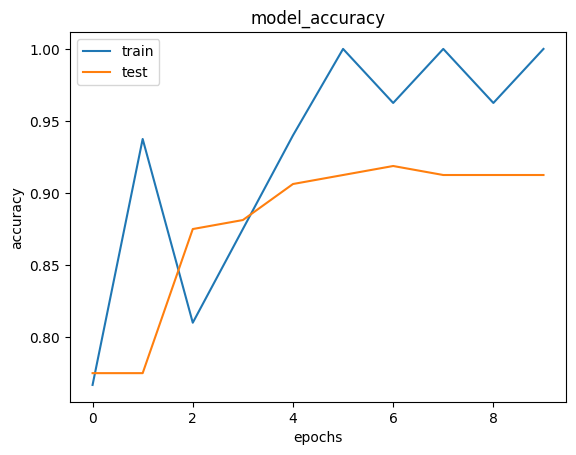

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

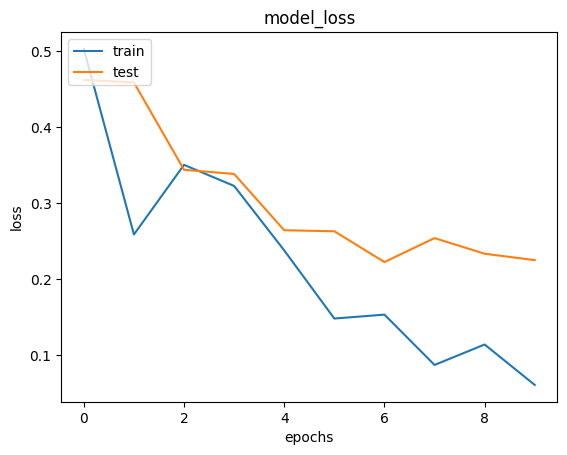

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [20]:
model_final.save('model_final.h5')

In [21]:
class_dictionary={}
class_dictionary[0]='empty'
class_dictionary[1]='occupied'

In [22]:
class_dictionary

{0: 'empty', 1: 'occupied'}

In [23]:
def make_prediction(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (48, 48))
    image = image / 255.0
    image = image.reshape(1, 48, 48, 3)

    prediction = model_final.predict(image)
    intid = np.argmax(prediction[0])

    label = class_dictionary[int(intid)]
    return label


In [24]:
import os
print(os.path.exists("/content/drive/MyDrive/parking project/train_data/train/occupied/roi_1.png"))


True


In [25]:
make_prediction("/content/drive/MyDrive/parking project/train_data/train/occupied/roi_1.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


'occupied'

In [26]:
make_prediction("/content/drive/MyDrive/parking project/train_data/train/empty/spot507.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


'empty'

In [27]:
model_final.save("model.keras")

In [28]:
import pickle

# Example: Saving your model object
# Replace 'model' with your actual variable name
data_to_save = {
    'model_name': 'Parking Detector',
    'status': 'deployed'
}

# Creating the file
with open('carposition.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)

print("File 'carposition.pkl' has been created!")

File 'carposition.pkl' has been created!
